In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data= pd.read_csv('train-data.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [7]:
train_data.drop(['Unnamed: 0'], axis=1, inplace= True)
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
train_data.shape

(6019, 13)

In [10]:
# Looking ate the unique values of Categorical Features
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [11]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Let's Drop some Rows which contains NULL values.

In [12]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [13]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
train_data.shape

(5975, 13)

In [15]:
train_data.reset_index(drop= True, inplace= True)
train_data.shape

(5975, 13)

So, in total I have 5975 Rows now to work forward. We have droped 44 rows

## Feature Engineering ⛏
There are many different data which could be extarcted from present. And, that's where Feature Engineering comes.

In [16]:
indx = train_data[train_data['Power']=='null bhp'].index
indx

Int64Index([  76,   79,   89,  120,  143,  225,  242,  259,  304,  305,
            ...
            5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941],
           dtype='int64', length=103)

In [17]:
train_data.drop(train_data.index[indx], inplace= True)
train_data.shape

(5872, 13)

In [18]:
train_data.reset_index(drop= True, inplace= True)

In [19]:
for col in train_data.columns:
    print(train_data[col].value_counts())

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Ritz VDi                        30
                                       ..
Hyundai i20 2015-2017 1.4 Magna ABS     1
Ford EcoSport 1.5 Petrol Trend          1
Volvo XC90 2007-2015 D5 AWD             1
Mahindra Scorpio S2 7 Seater            1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1811, dtype: int64
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Ye

We can see that Engine and Power have a constant suffix 'CC' and 'bhp' respectively.
While for mileage it keeps varying between 'km/kg' and 'kmpl'

Let us confirm this once.

In [20]:
Engine = pd.DataFrame(train_data['Engine'])
Engine

,Engine
0,998 CC
1,1582 CC
2,1199 CC
3,1248 CC
4,1968 CC
...,...
5867,1248 CC
5868,1120 CC
5869,2498 CC
5870,998 CC


In [21]:
Power = pd.DataFrame(train_data['Power'])
Power

,Power
0,58.16 bhp
1,126.2 bhp
2,88.7 bhp
3,88.76 bhp
4,140.8 bhp
...,...
5867,74 bhp
5868,71 bhp
5869,112 bhp
5870,67.1 bhp


In [22]:
Mileage= pd.DataFrame(train_data['Mileage'])
Mileage

,Mileage
0,26.6 km/kg
1,19.67 kmpl
2,18.2 kmpl
3,20.77 kmpl
4,15.2 kmpl
...,...
5867,28.4 kmpl
5868,24.4 kmpl
5869,14.0 kmpl
5870,18.9 kmpl


In [23]:
for i in range(Engine.shape[0]):
    Engine.at[i, 'Engine_capacity']= int(Engine['Engine'][i].split()[0])
    Engine.at[i, 'Engine_cap_unit']= Engine['Engine'][i].split()[1]
    Power.at[i, 'Power_cap']= float(Power['Power'][i].split()[0])
    Power.at[i, 'Power_unit']= Power['Power'][i].split()[1]
    Mileage.at[i, 'Mileage_cap']= float(Mileage['Mileage'][i].split()[0])
    Mileage.at[i, 'Mileage_unit']= Mileage['Mileage'][i].split()[1]

Engine

,Engine,Engine_capacity,Engine_cap_unit
0,998 CC,998.0,CC
1,1582 CC,1582.0,CC
2,1199 CC,1199.0,CC
3,1248 CC,1248.0,CC
4,1968 CC,1968.0,CC
...,...,...,...
5867,1248 CC,1248.0,CC
5868,1120 CC,1120.0,CC
5869,2498 CC,2498.0,CC
5870,998 CC,998.0,CC


In [24]:
for i in Engine.columns:
    print(Engine[i].value_counts())

1197 CC    604
1248 CC    496
1498 CC    303
998 CC     259
2179 CC    240
          ... 
1489 CC      1
1422 CC      1
2706 CC      1
1978 CC      1
1797 CC      1
Name: Engine, Length: 139, dtype: int64
1197.0    604
1248.0    496
1498.0    303
998.0     259
2179.0    240
         ... 
1489.0      1
1422.0      1
2706.0      1
1978.0      1
1797.0      1
Name: Engine_capacity, Length: 139, dtype: int64
CC    5872
Name: Engine_cap_unit, dtype: int64


In [25]:
for i in Power.columns:
    print(Power[i].value_counts())

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
340 bhp         1
80.9 bhp        1
68.1 bhp        1
301.73 bhp      1
181.04 bhp      1
Name: Power, Length: 370, dtype: int64
74.00     235
98.60     131
73.90     125
140.00    123
88.50     112
         ... 
301.73      1
174.57      1
76.90       1
201.00      1
181.04      1
Name: Power_cap, Length: 368, dtype: int64
bhp    5872
Name: Power_unit, dtype: int64


In [26]:
for i in Mileage.columns:
    print(Mileage[i].value_counts())

18.9 kmpl     172
17.0 kmpl     149
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
9.7 kmpl        1
22.8 km/kg      1
8.0 kmpl        1
14.33 kmpl      1
17.24 kmpl      1
Name: Mileage, Length: 440, dtype: int64
18.90    172
17.00    149
18.60    119
20.36     88
21.10     87
        ... 
18.18      1
11.56      1
19.91      1
16.38      1
17.24      1
Name: Mileage_cap, Length: 429, dtype: int64
kmpl     5807
km/kg      65
Name: Mileage_unit, dtype: int64


Hence confirmed

Now converting kmph into kmpl for to bring it to same unit for whole column
km/kg/1.1764 = kmpl

In [27]:
# for i in range(Mileage.shape[0]):
#     if Mileage['Mileage'][i].split()[1]== 'km/kg':
#         Mileage['Mileage_unit'][i]= Mileage['Mileage_unit'][i]/1.1764

def kmkgTokmpl(a):
    if a.split()[1]== 'km/kg':
        return round(float(a.split()[0])/1.1764, 2)
    else:
        return round(float(a.split()[0]),2)
# Mileage['Mileage'].apply(kmkgTokmpl)
Mileage['Mileage_cap_all_kmpl']= Mileage['Mileage'].apply(kmkgTokmpl)
Mileage

,Mileage,Mileage_cap,Mileage_unit,Mileage_cap_all_kmpl
0,26.6 km/kg,26.60,km/kg,22.61
1,19.67 kmpl,19.67,kmpl,19.67
2,18.2 kmpl,18.20,kmpl,18.20
3,20.77 kmpl,20.77,kmpl,20.77
4,15.2 kmpl,15.20,kmpl,15.20
...,...,...,...,...
5867,28.4 kmpl,28.40,kmpl,28.40
5868,24.4 kmpl,24.40,kmpl,24.40
5869,14.0 kmpl,14.00,kmpl,14.00
5870,18.9 kmpl,18.90,kmpl,18.90


In [28]:
train_data['Mileage']= Mileage['Mileage_cap_all_kmpl']
train_data['Power']= Power['Power_cap']
train_data['Engine']= Engine['Engine_capacity']


In [29]:

# dropping the unwanted column
train_data.drop(['New_Price'], axis=1, inplace=True)

#correcting the datatype
train_data['Engine']= train_data['Engine'].astype(int)
train_data['Seats']= train_data['Seats'].astype(int)
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,22.61,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int32  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int32  
 11  Price              5872 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 504.8+ KB


In [31]:
# Concentrating on name column
# We can see that name starts with company name, then car name then the model and so on
# So we will use only company name we will not use rest as it will create complications and also there wont be many data points for each car model and version so our ML model will not get trained properly
# We can consider the car name as well , let us see how mature our model is and then decide and come back

for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]

train_data.drop(['Name'], axis= 1, inplace= True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,22.61,998,58.16,5,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi


## Data Visualization
### Let's Plot some
Data visualization is the best way to find out how a data looks like

**Price**: First let's have a look over our target column

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_35064\2101072918.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Price'])


(0.0, 160.0)

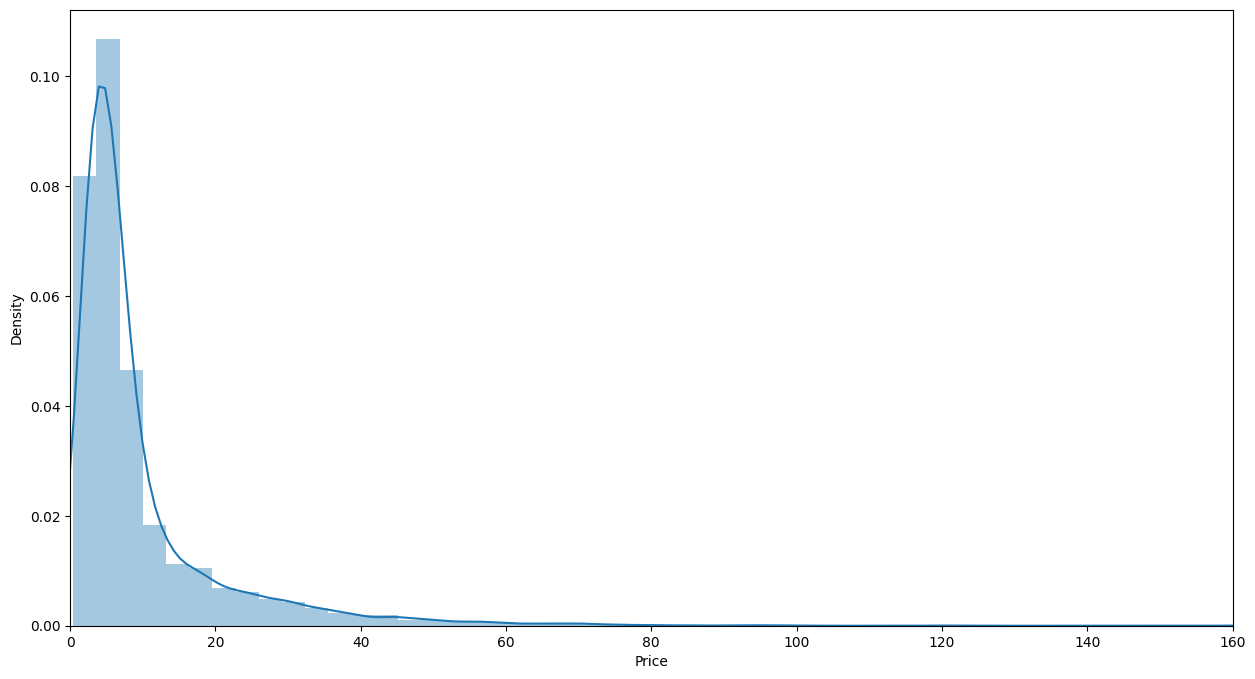

In [32]:
f, ax= plt.subplots(figsize= (15, 8))
sns.distplot(train_data['Price'])
plt.xlim([0, 160])

**Fuel Type**

In [33]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

(-0.5, 3.5, 0.0, 165.0)

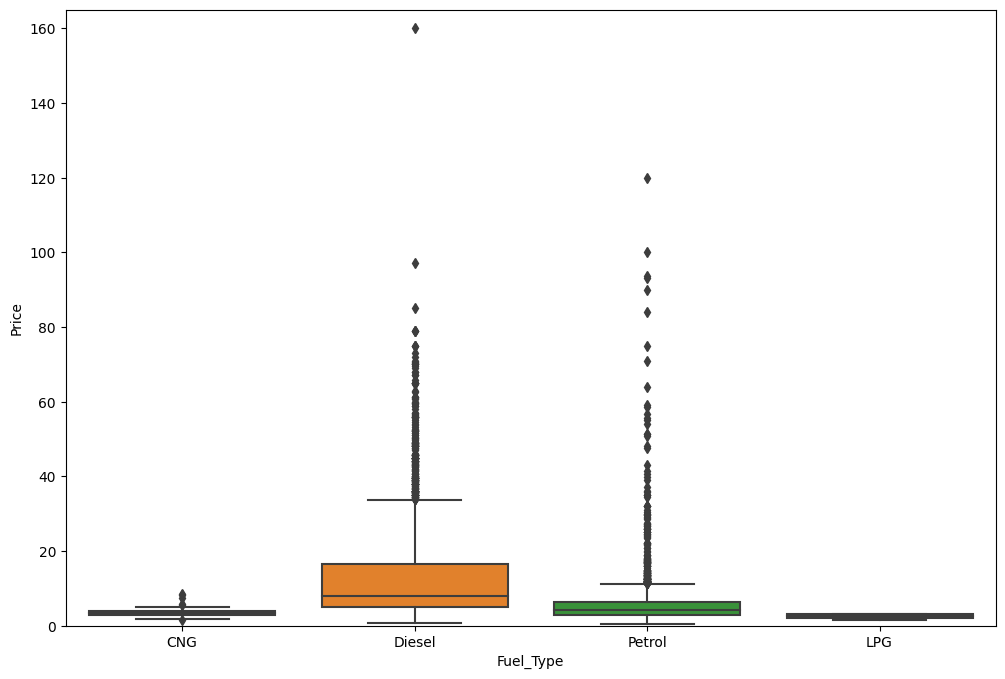

In [34]:
var= 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165)

As known, diesel car would cost more

**Year**

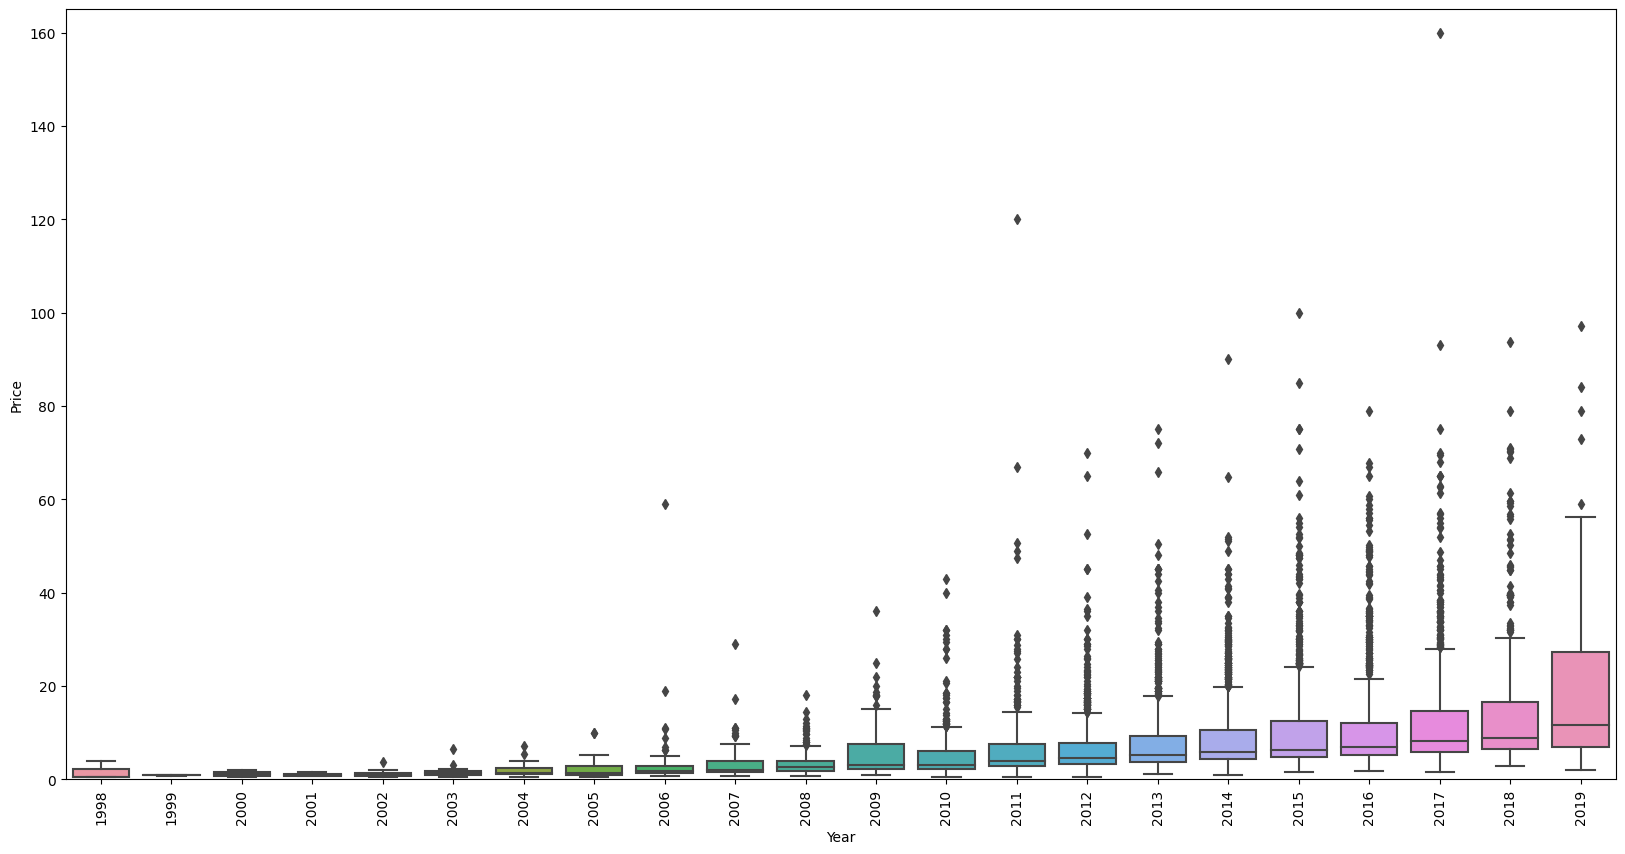

In [35]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

As we know,</br>
Price of Newest is high compared to old models.

**Owner Type**

<Axes: xlabel='Owner_Type', ylabel='Price'>

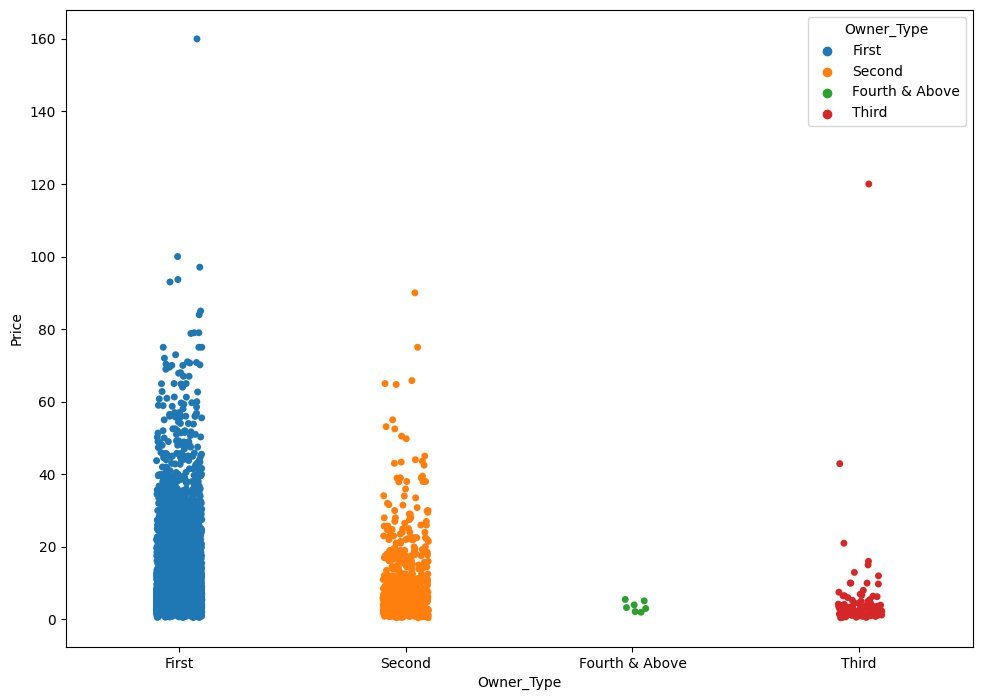

In [36]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data, hue=var) 

**Company**

<Figure size 2000x1000 with 0 Axes>

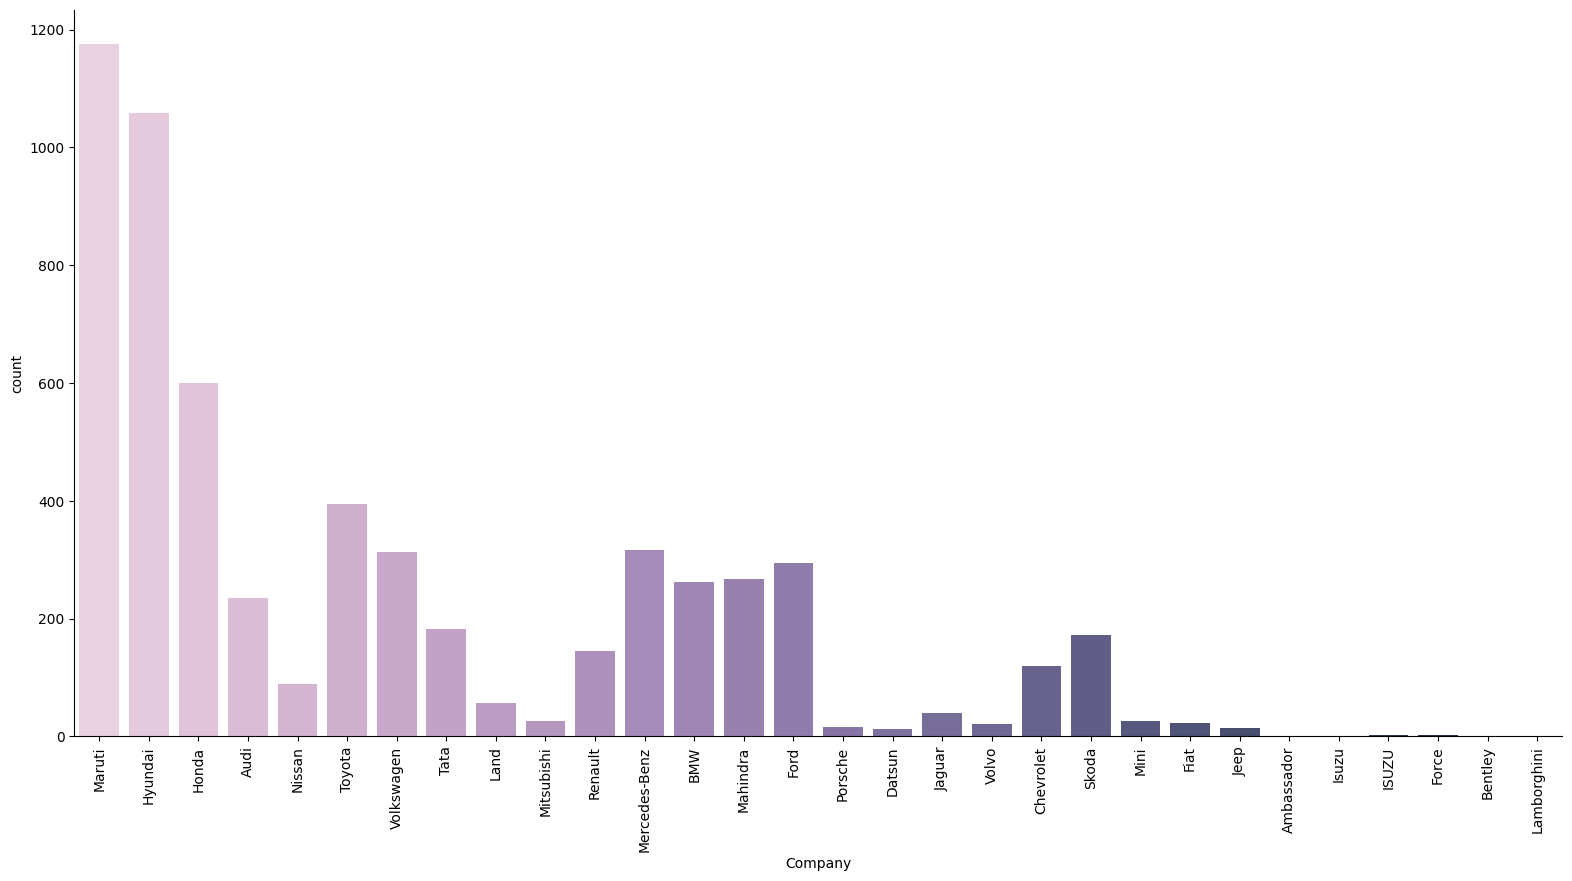

In [37]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:2.55", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

Cleary Maruti is most comman brand followed by Hyundai

### Categorical data

As for now we have left with only 5 categorical features:

1. Location
2. Fuel_Type
5. Transmission
9. Owner_Type
6. Company

</br>

For hadeling categorical data. We modtly use these 2 path:

1. OneHotEncoder
35. LabelEncoder
Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

**Location**

In [38]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

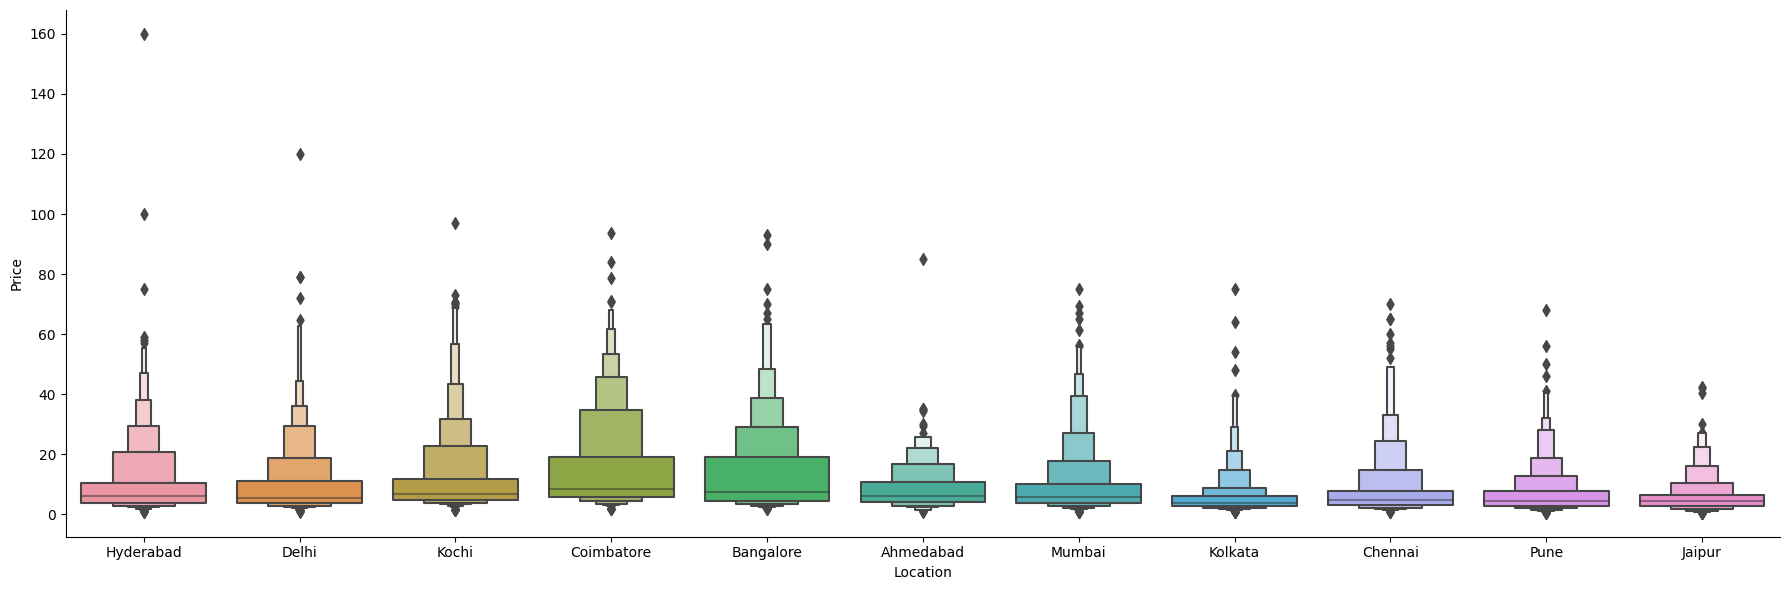

In [39]:
# Plot Location vs Price
sns.catplot(y='Price',x='Location',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

We will be using One-hot-encoding here

In [40]:
Location = train_data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


**Fuel Type**

In [41]:
train_data['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

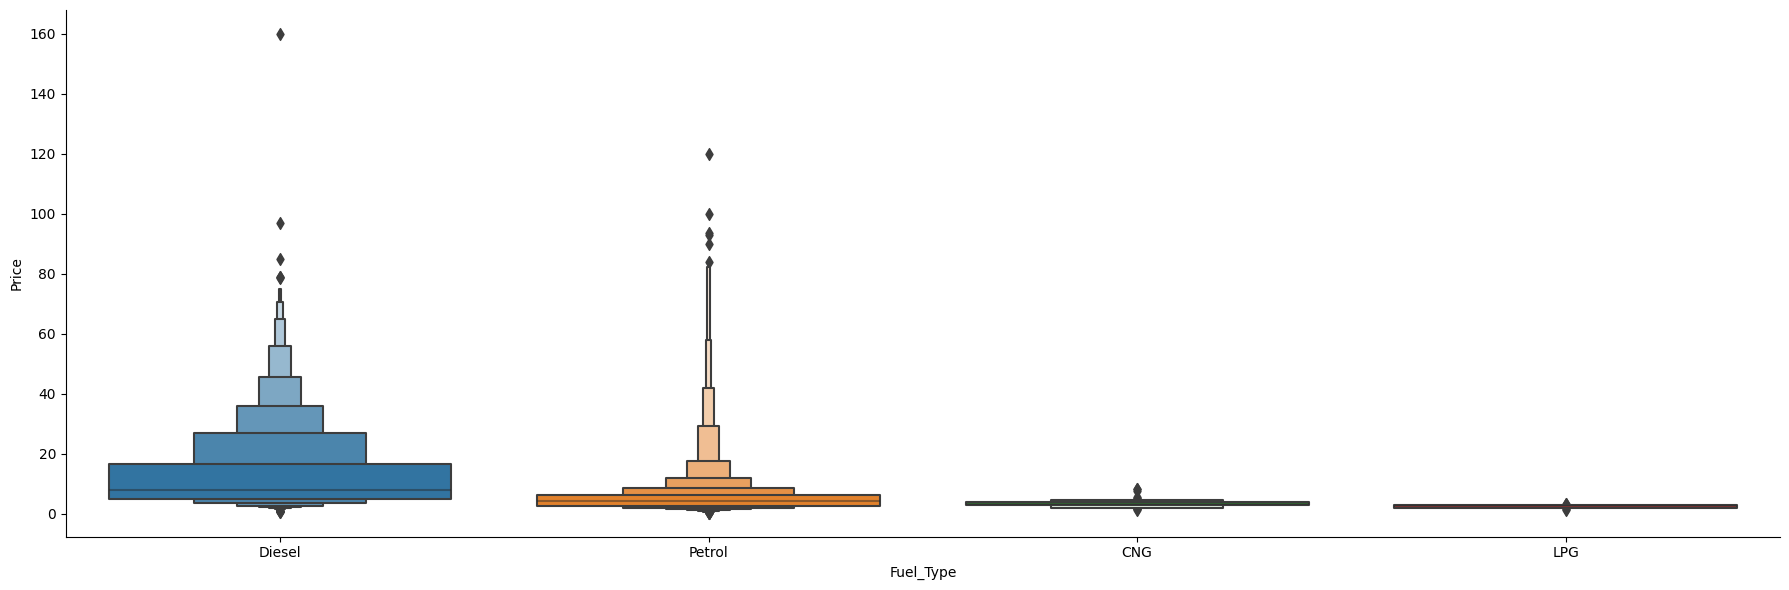

In [42]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x='Fuel_Type',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

We will be using One-hot-encoding as well

In [43]:
Fuel_t = train_data[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


**Transmission**

<function matplotlib.pyplot.show(close=None, block=None)>

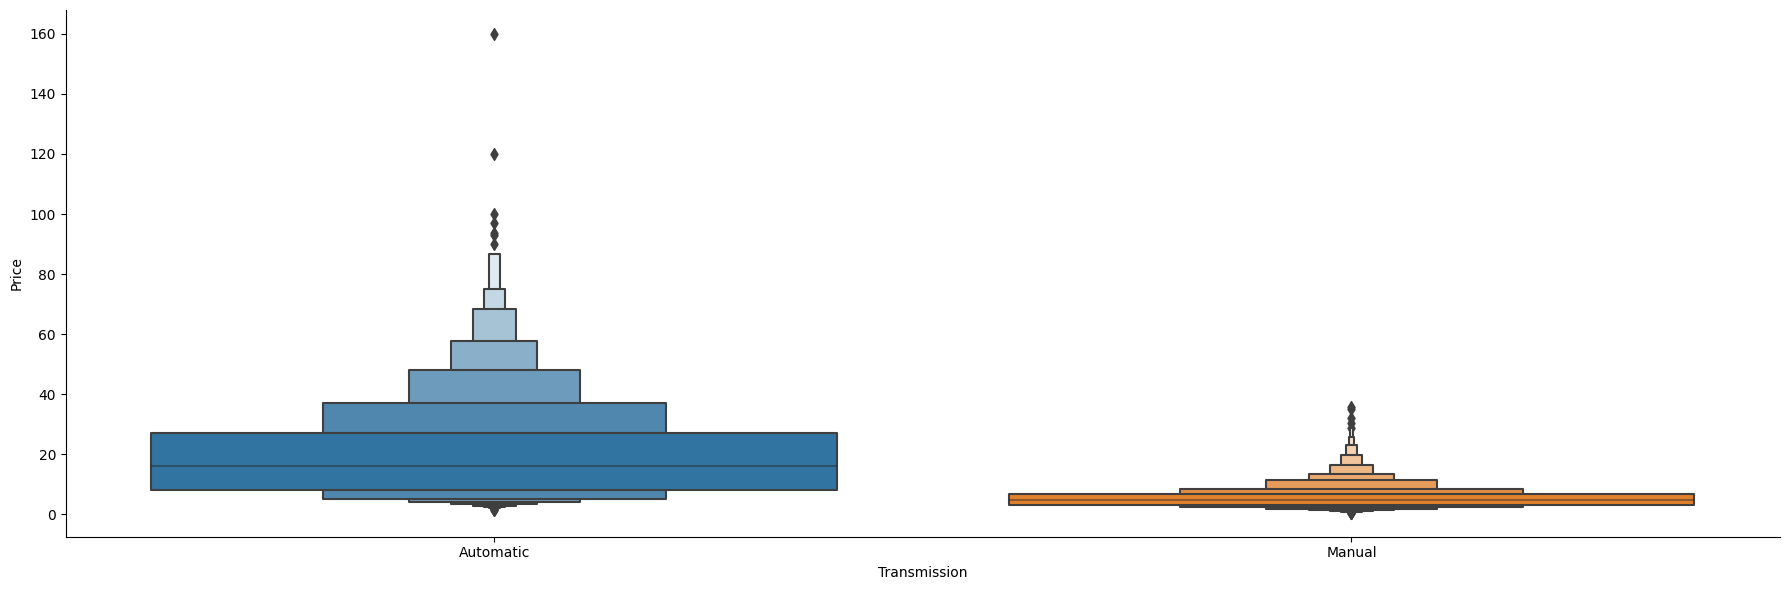

In [44]:
train_data['Transmission'].value_counts()

# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x='Transmission',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

No, order so One-hot-encoding

In [45]:
Transmission = train_data[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


**Owner_Type**

In [46]:
train_data['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

As Owner_Type column has ordered data so we will be using Label Encoding

In [47]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,1,22.61,998,58.16,5,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5,17.74,Audi


**Company**

In [48]:
train_data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

There are a lot of categories. But we will try one hot encoding

In [49]:
Company = train_data[['Company']]
Company = pd.get_dummies(Company,drop_first=True)
Company.head()

,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
final_train_data= pd.concat([train_data, Location, Fuel_t, Transmission, Company], axis=1)
final_train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,Mumbai,2010,72000,CNG,Manual,1,22.61,998,58.16,5,...,0,0,0,0,0,0,0,0,0,0
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5,...,0,0,0,0,0,0,0,0,0,0
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7,...,0,0,0,0,0,0,0,0,0,0
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5,...,0,0,0,0,0,0,0,0,0,0


In [51]:
final_train_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Company',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Company_Audi',
       'Company_BMW', 'Company_Bentley', 'Company_Chevrolet', 'Company_Datsun',
       'Company_Fiat', 'Company_Force', 'Company_Ford', 'Company_Honda',
       'Company_Hyundai', 'Company_ISUZU', 'Company_Isuzu', 'Company_Jaguar',
       'Company_Jeep', 'Company_Lamborghini', 'Company_Land',
       'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz',
       'Company_Mini', 'Company_Mitsubishi', 'Company_Nissan',
       'Company_Porsche', 'Company_Renault', 'Company_Skoda', 'Company_Tata',
       'Co

In [52]:
final_train_data.drop(["Location","Fuel_Type","Transmission","Company"],axis=1,inplace=True)
final_train_data.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,2010,72000,1,22.61,998,58.16,5,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,1,19.67,1582,126.20,5,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,1,18.20,1199,88.70,5,4.50,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,1,20.77,1248,88.76,7,6.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,2,15.20,1968,140.80,5,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
final_train_data.shape

(5872, 51)

In [54]:
final_train_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Company_Audi',
       'Company_BMW', 'Company_Bentley', 'Company_Chevrolet', 'Company_Datsun',
       'Company_Fiat', 'Company_Force', 'Company_Ford', 'Company_Honda',
       'Company_Hyundai', 'Company_ISUZU', 'Company_Isuzu', 'Company_Jaguar',
       'Company_Jeep', 'Company_Lamborghini', 'Company_Land',
       'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz',
       'Company_Mini', 'Company_Mitsubishi', 'Company_Nissan',
       'Company_Porsche', 'Company_Renault', 'Company_Skoda', 'Company_Tata',
       'Company_Toyota', 'Company_Volkswagen', 'Company_Volvo'],
    

In [55]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,1,22.61,998,58.16,5,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5,17.74,Audi


## Split train and test data

In [56]:
X= final_train_data.drop(['Price'], axis= 1)
X.shape

(5872, 50)

In [80]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Company_Audi',
       'Company_BMW', 'Company_Bentley', 'Company_Chevrolet', 'Company_Datsun',
       'Company_Fiat', 'Company_Force', 'Company_Ford', 'Company_Honda',
       'Company_Hyundai', 'Company_ISUZU', 'Company_Isuzu', 'Company_Jaguar',
       'Company_Jeep', 'Company_Lamborghini', 'Company_Land',
       'Company_Mahindra', 'Company_Maruti', 'Company_Mercedes-Benz',
       'Company_Mini', 'Company_Mitsubishi', 'Company_Nissan',
       'Company_Porsche', 'Company_Renault', 'Company_Skoda', 'Company_Tata',
       'Company_Toyota', 'Company_Volkswagen', 'Company_Volvo'],
      dtype='

In [57]:
y= final_train_data['Price']
y.shape

(5872,)

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_35064\2150153591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')


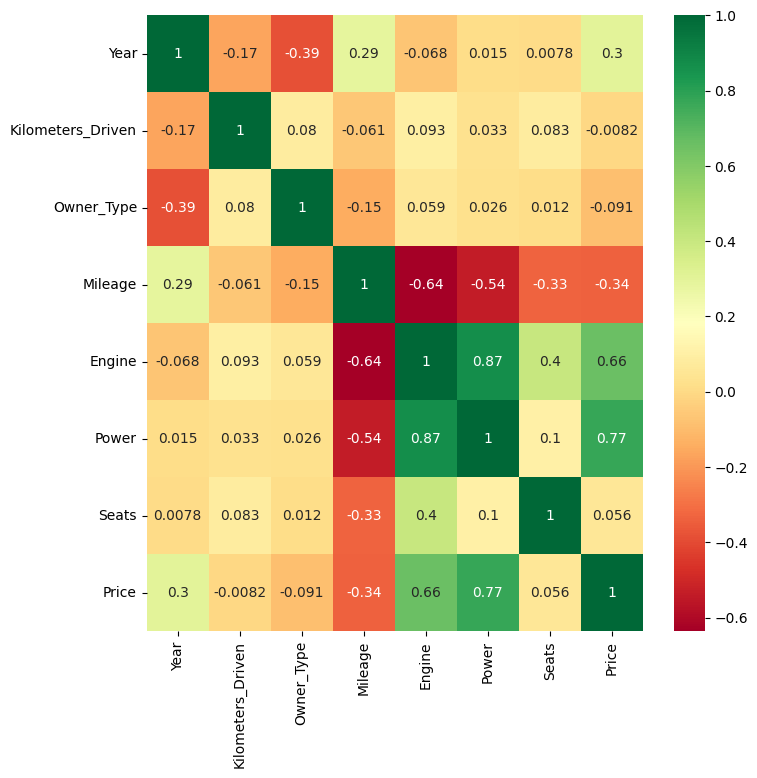

In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

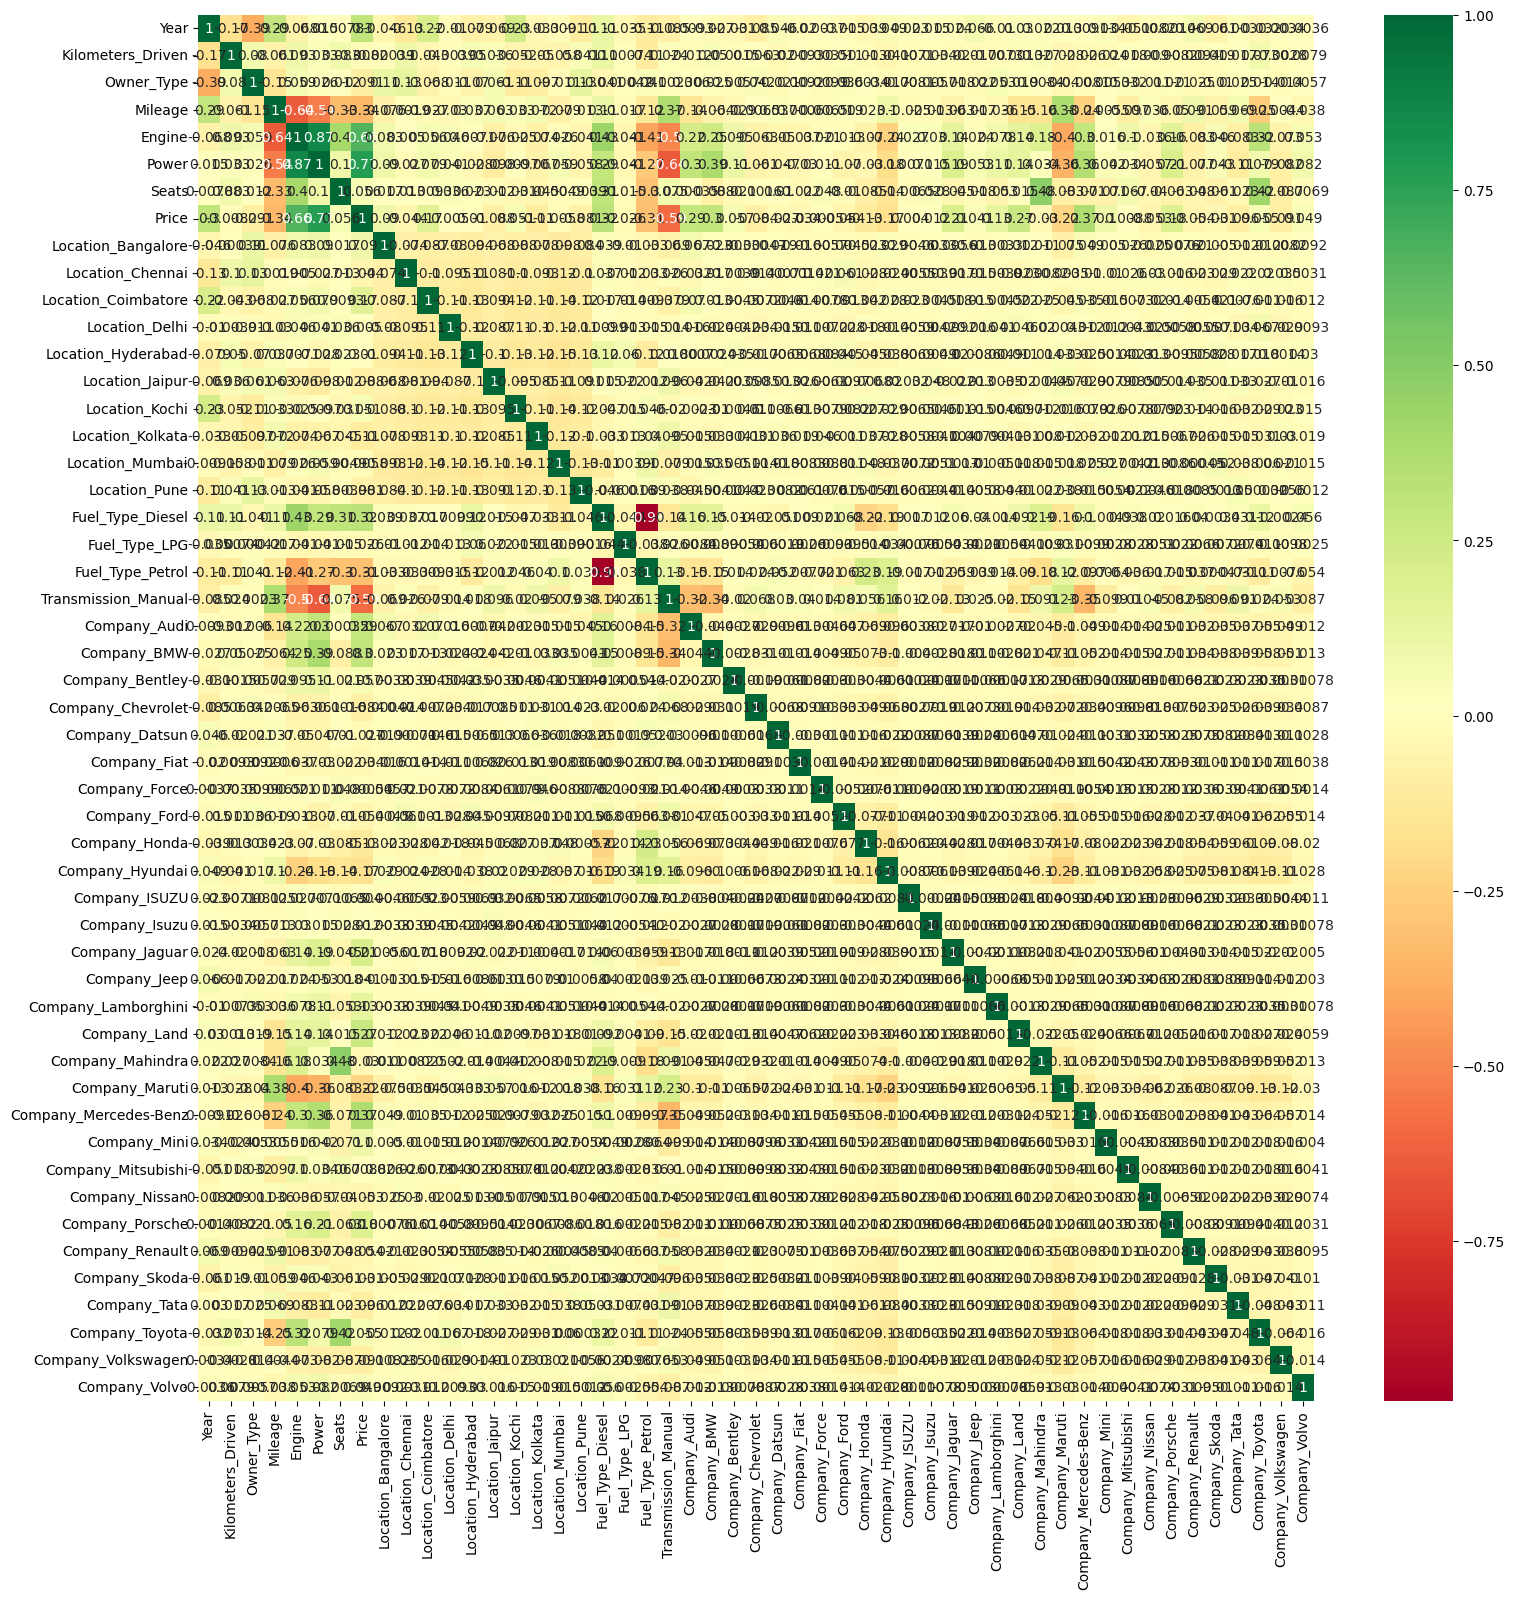

In [59]:
plt.figure(figsize=(18, 18))
sns.heatmap(final_train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

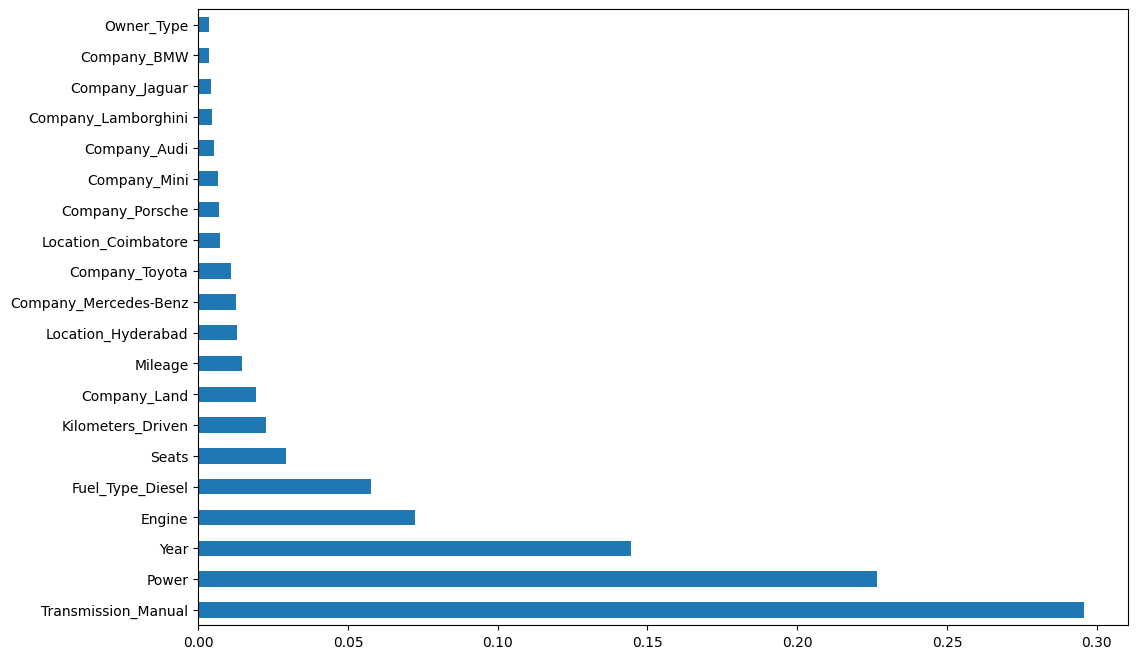

In [61]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model building

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

### First let us try Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7835861249612557
Accuracy on Testing set:  0.7493225586345977


In [64]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\tError Table: - Linear Regression")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

	Error Table: - Linear Regression
Mean Absolute Error      :  3.1091768402714828
Mean Squared  Error      :  31.657603673878686
Root Mean Squared  Error :  5.626509013045184
R Squared Error          :  0.7493225586345977


### Now let us use Random Forest Regressor and see

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9859345286898521
Accuracy on Testing set:  0.8902465606782106


💥💥💥💥 Oh Yes!!!

That's a good Accuracy

In [66]:
print("\tError Table: - Random Forest Regressor")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

	Error Table: - Random Forest Regressor
Mean Absolute Error      :  1.6017781874432329
Mean Squared  Error      :  13.860564656193448
Root Mean Squared  Error :  3.7229779285127984
R Squared Error          :  0.8902465606782106


## Hyper-parameter tunning

In [67]:
# number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)]

# minimum number of samples required to split a node
min_samples_split= [2, 5, 10, 15, 100]

# min number of samples required at each leaf node
min_samples_leaf= [1, 2, 5, 10]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# create random grid

random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
rf_random = RandomizedSearchCV(estimator= rf_reg, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, verbose= 2, random_state= 32, n_jobs= 1)

In [71]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  30.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  28.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  26.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  26.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  27.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   6.1s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   6.5s
[CV] END max_depth=30, min_sam

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=32, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
predictions = rf_random.predict(X_test)

In [73]:
predictions

array([8.41436681, 3.56390803, 8.70344534, ..., 6.59256607, 7.5922679 ,
       3.83586371])

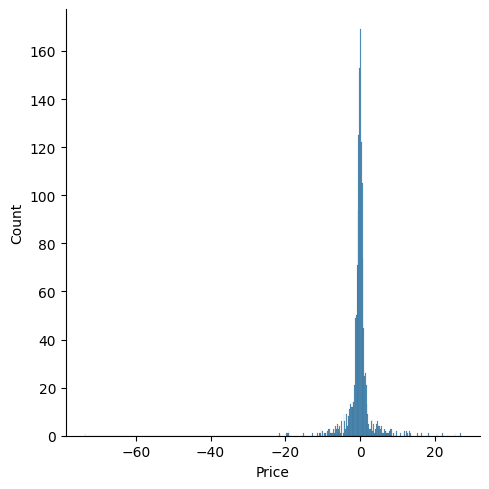

In [74]:
sns.displot(y_test-predictions)

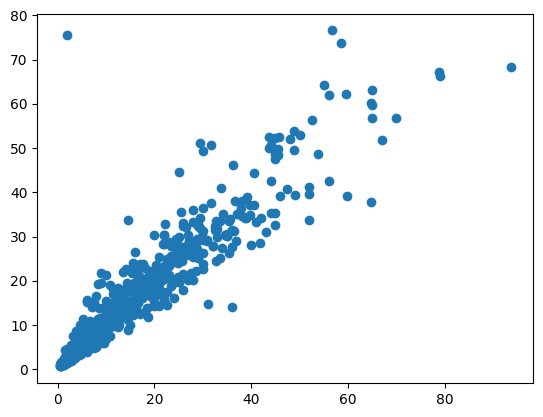

In [75]:
plt.scatter(y_test, predictions)

In [76]:
print("\tError Table: - HyperTuned Random Forest Regressor")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

	Error Table: - HyperTuned Random Forest Regressor
Mean Absolute Error      :  1.6017781874432329
Mean Squared  Error      :  13.860564656193448
Root Mean Squared  Error :  3.7229779285127984
R Squared Error          :  0.8902465606782106


In [77]:
import pickle

file = open('rfr_ht_model.pkl', 'wb')

pickle.dump(rf_random, file)